@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/QlQPJQG2Mmc

# <b>Curtosis (o Kurtosis en inglés) </b>
### *La curtosis es una medida de si los datos tienen colas pesadas (propensos a valores atípicos) o colas ligeras (propensos a no tener valores atípicos) en relación con una distribución normal* (NIST, 2024).

**Referencia**

National Institute of Standards and Technology (2024). Measures of Skewness and Kurtosis. Disponible en: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm


# Módulos a utilizar

In [1]:
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

# Datos Sintéticos y Curtosis Negativa

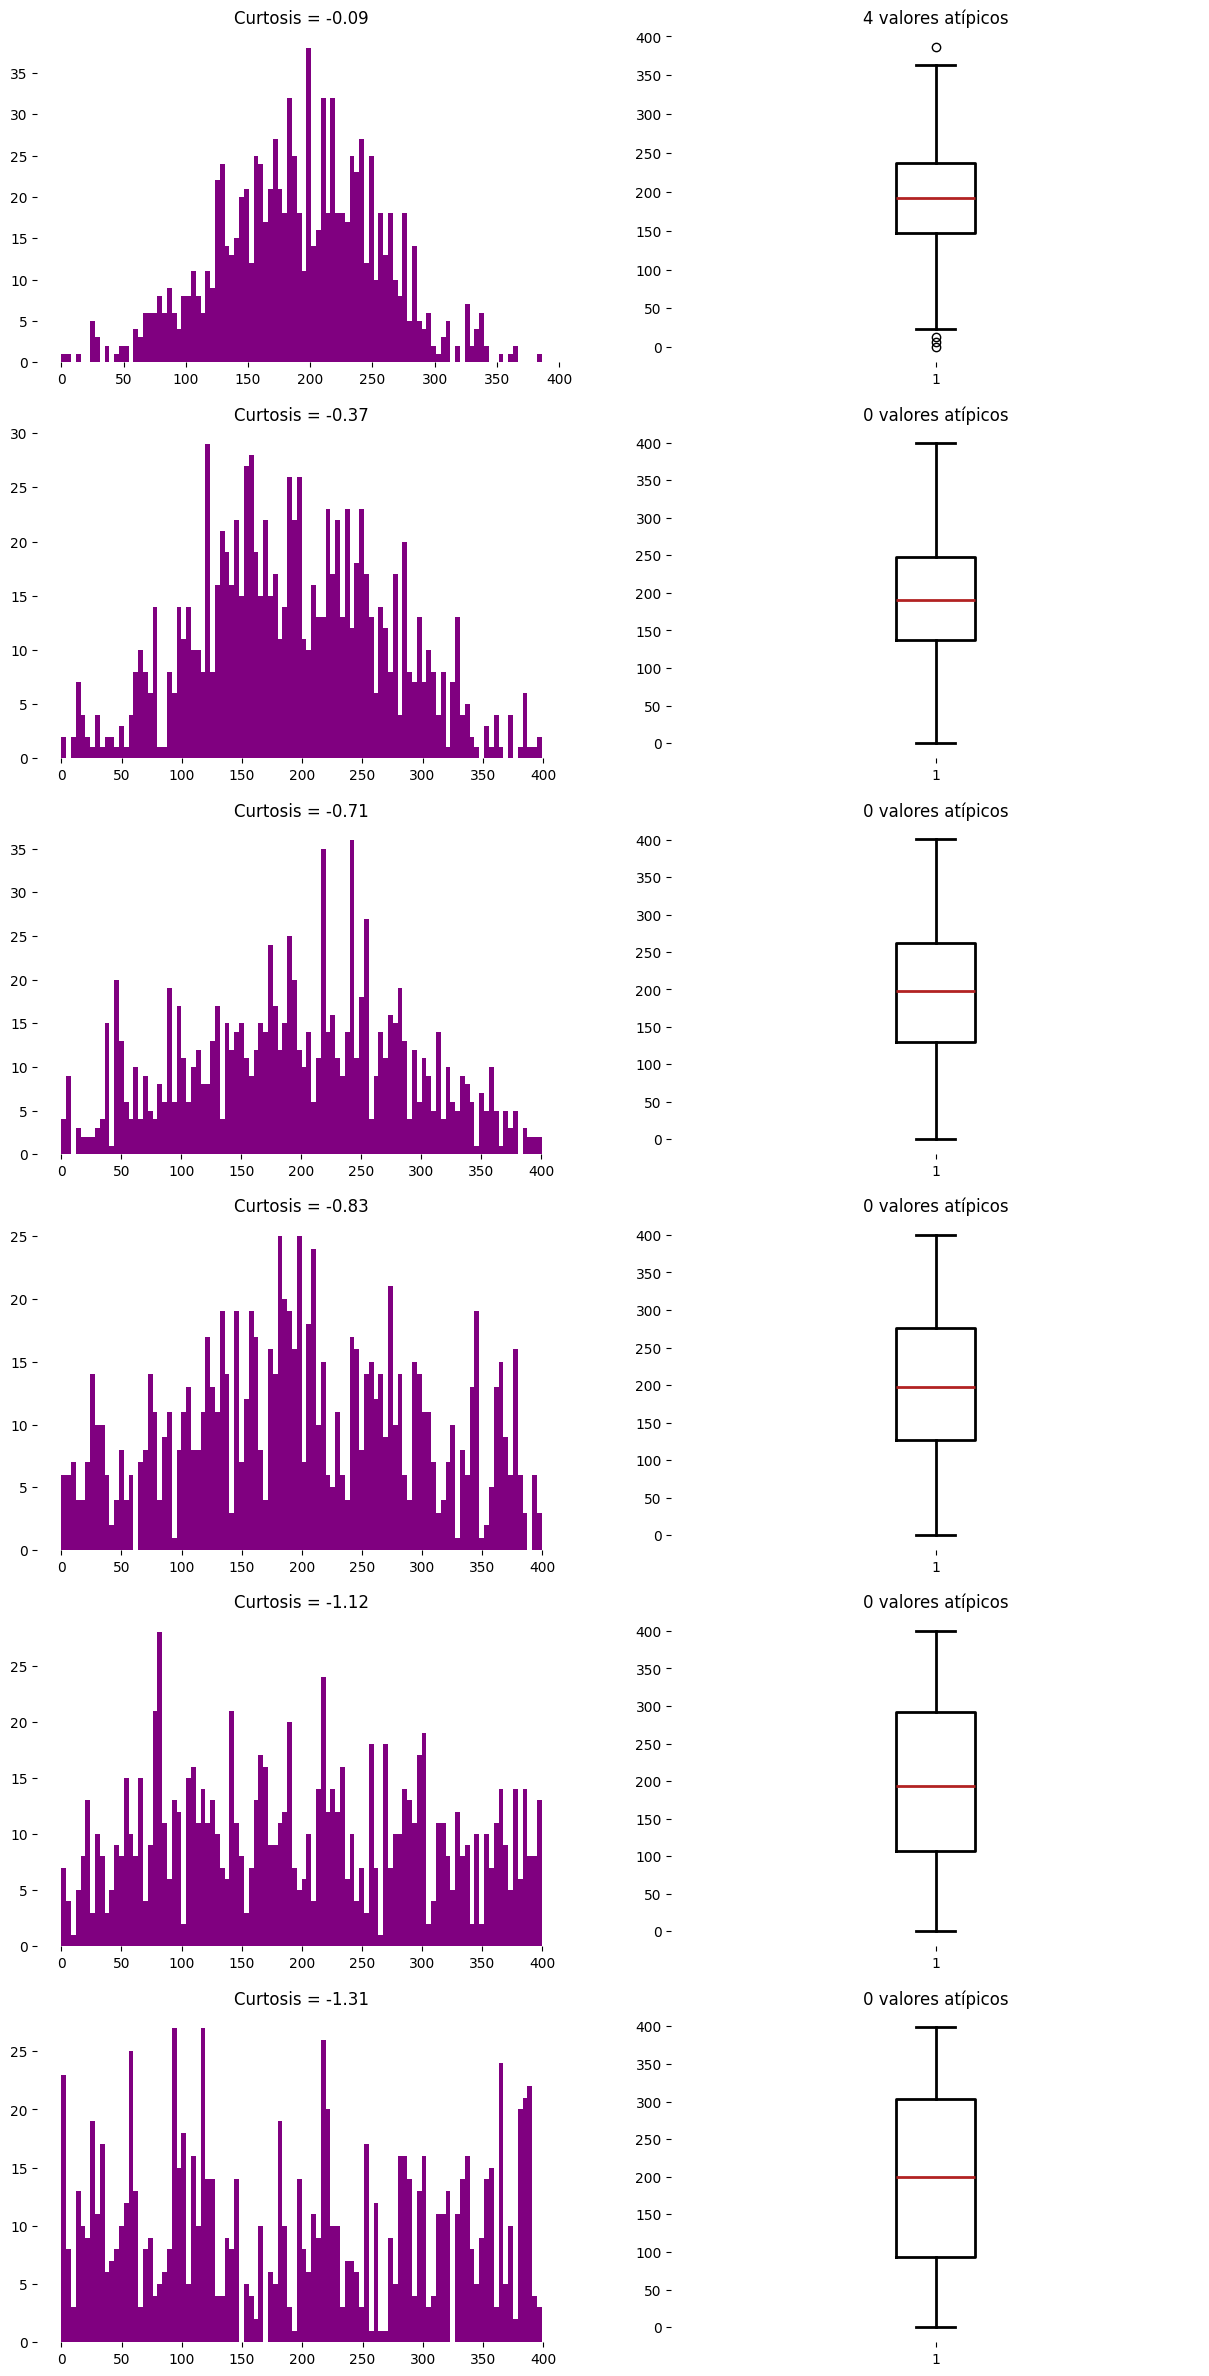

In [2]:
# creando subfiguras
figura, subfiguras = plt.subplots(6, 2)
figura.set_size_inches(15, 30)

# Semilla para propósitos de reproducibilidad
np.random.seed(seed=5)

# tamano de la muestra
tamano = 1000

# creando conjuntos de datos con diferentes niveles de curtosis negativas

for subfigura, corte in enumerate(np.arange(3, 0, -0.5)):
  # generando datos sintéticos a partir de una distribución normal
  datos = np.random.normal(loc=0, scale=1, size=tamano)

  # quitando datos de las colas a partir de un punto de corte para hacerlos menos extremos
  datos = datos[(-corte < datos) & (datos < corte)]

  # remuestreando datos para garantizar una muestra de tamano 1000
  datos = np.random.choice(datos, size=tamano)

  # escalando los datos entre un rango de 0 y 200 con fines de ilustración
  datos = ((datos - datos.min()) / datos.max()) * 200

  # contando los valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  num_atipicos = datos[datos > maximo].size + datos[datos < minimo].size

  # graficando histograma
  subfiguras[subfigura, 0].hist(datos, bins=100, color="purple")

  # calculando la curtosis
  subfiguras[subfigura, 0].set_title("Curtosis = %0.2f" % kurtosis(datos))

  # graficando diagrama de caja
  subfiguras[subfigura, 1].boxplot(datos,
                                   boxprops=dict(linewidth=2),
                                   medianprops = dict(linewidth=2, color="firebrick"),
                                   whiskerprops = dict(linewidth=2),
                                   capprops= dict(linewidth=2))
  subfiguras[subfigura, 1].set_title("%d valores atípicos" % num_atipicos)

  # quitando submarcos de las subfiguras
  for subfig in range(len(subfiguras[subfigura])):
    for llave, marco in subfiguras[subfigura, subfig].spines.items():
      marco.set_visible(False)

#plt.savefig("curtosis_negativa.png", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

# Datos Sintéticos y Curtosis Positiva

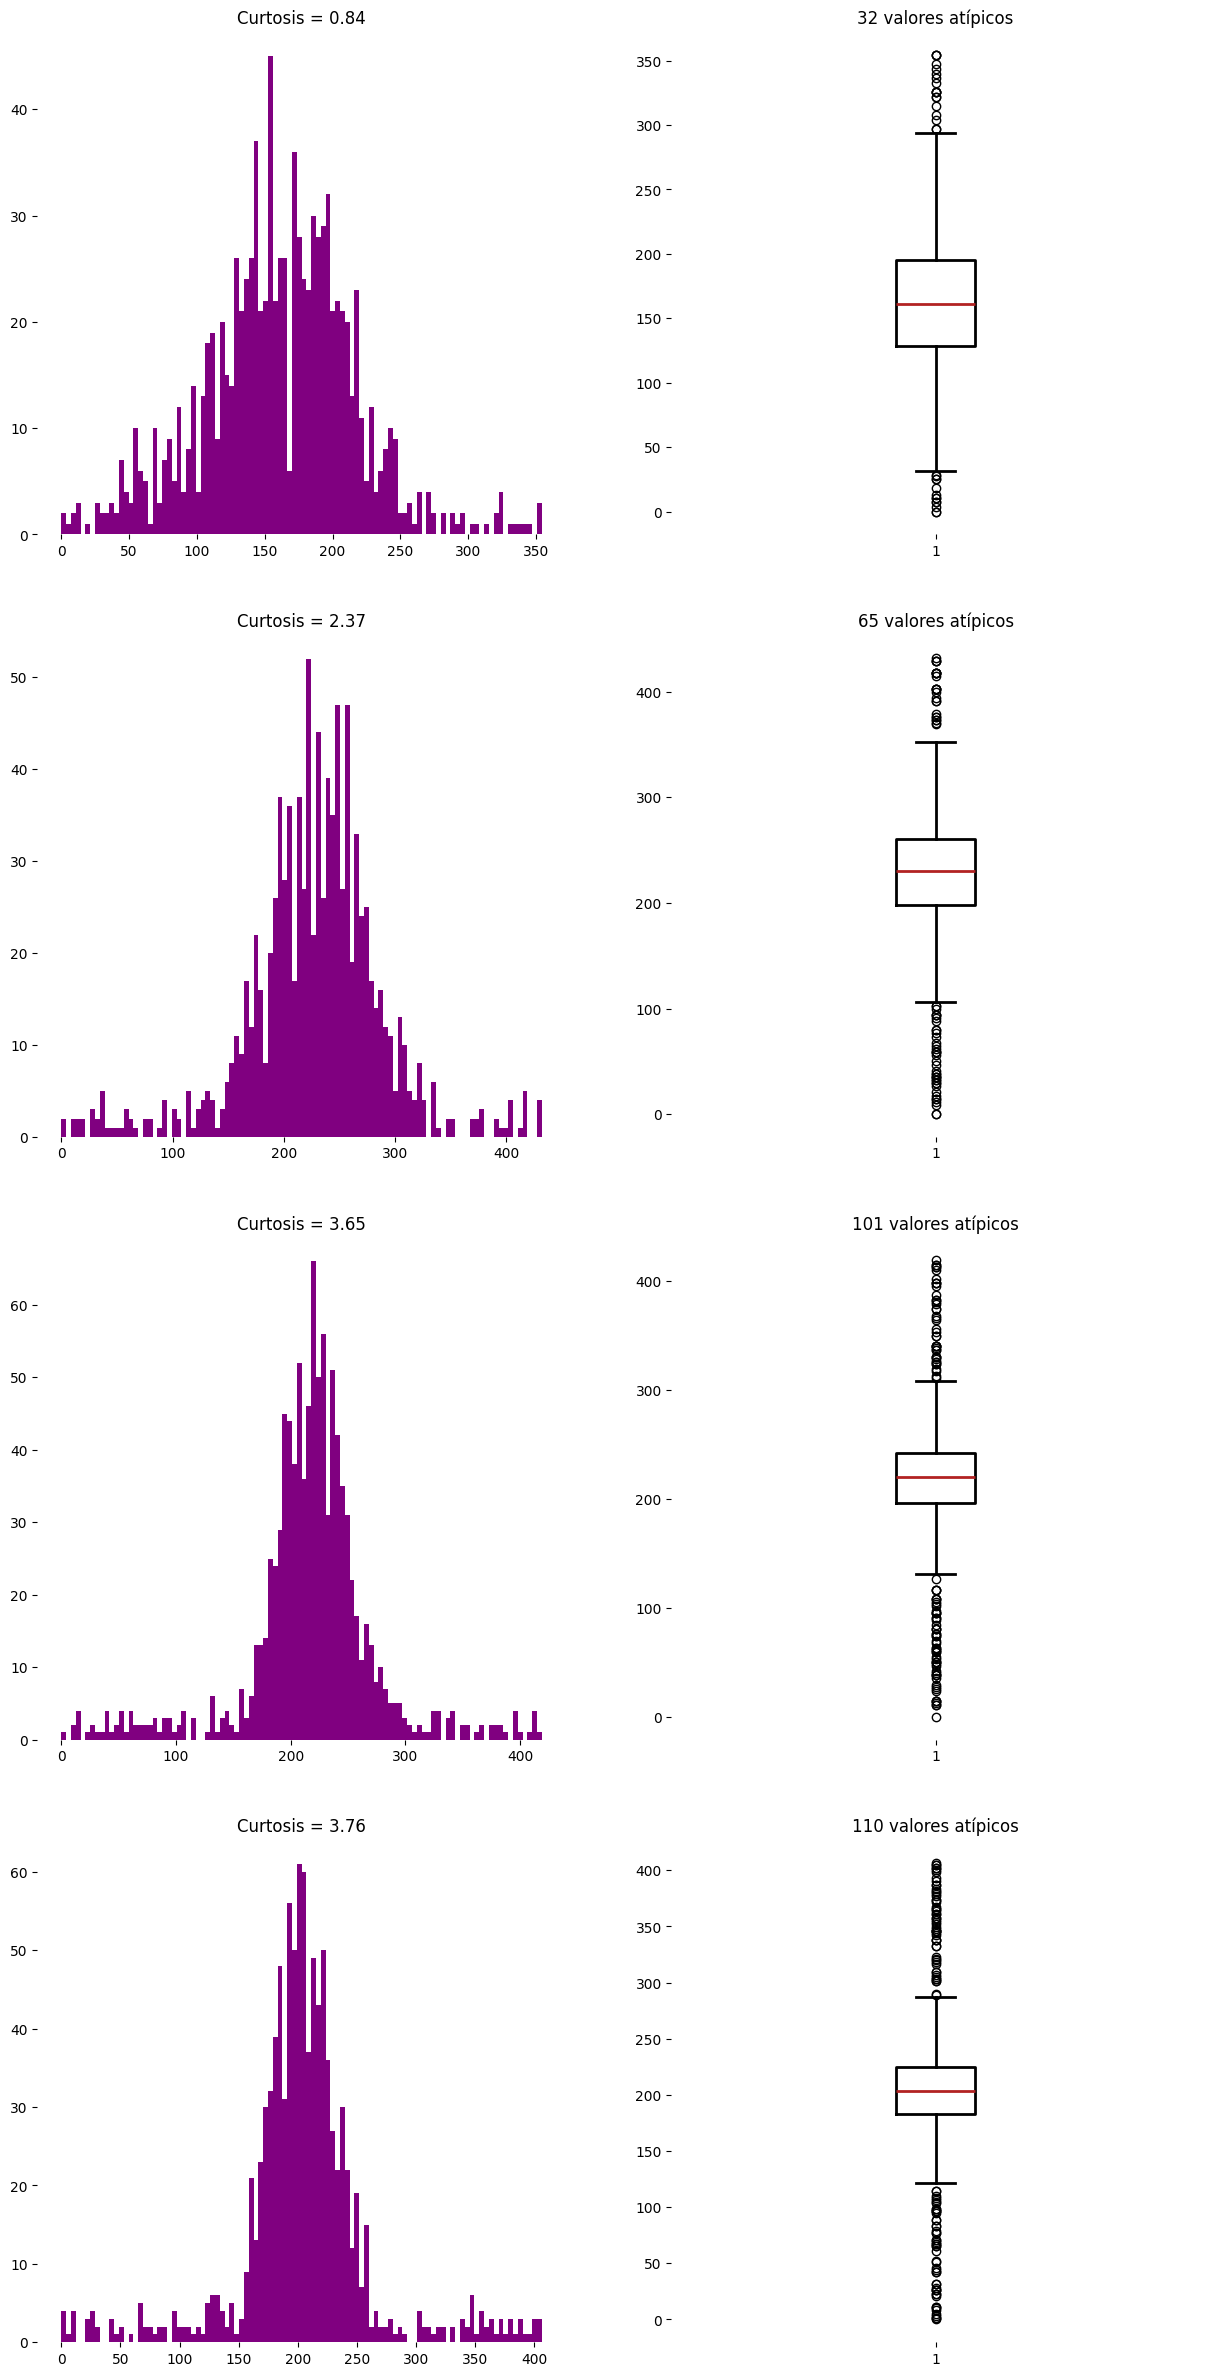

In [3]:
# Semilla para propósitos de reproducibilidad
np.random.seed(seed=1)

# creando subfiguras
figura, subfiguras = plt.subplots(4, 2)
figura.set_size_inches(15, 30)

# creando conjuntos de datos con diferentes niveles de curtosis positivas

for subfigura, rareza in enumerate(np.arange(1, 3, 0.5)):
  # generando datos sintéticos a partir de una distribución normal
  datos = np.random.normal(loc=0, scale=1, size=tamano)

  # identificando valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  atipicos = datos[(minimo > datos) | (datos > maximo)]

  # alejando aún más a los valores atípicos de la medida vía un factor de rareza
  atipicos = atipicos * rareza

  # creando valores intermedios entre los valores atípicos y los típicos
  atipicos = np.linspace(atipicos.min(), atipicos.max(), int(100*rareza))

  # uniendo los valores atípicos con los típicos
  datos = np.concatenate((datos, atipicos))

  # remuestreando datos para garantizar una muestra de tamano 1000
  datos = np.random.choice(datos, size=tamano)

  # escalando los datos entre un rango de 0 y 200 con fines de ilustración
  datos = ((datos - datos.min()) / datos.max()) * 200

  # contando los valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  num_atipicos = datos[datos > maximo].size + datos[datos < minimo].size

  # graficando diagrama de caja
  subfiguras[subfigura, 0].hist(datos, bins=100, color="purple")

  # calculando la curtosis
  subfiguras[subfigura, 0].set_title("Curtosis = %0.2f" % kurtosis(datos))

  # graficando diagrama de caja
  subfiguras[subfigura, 1].boxplot(datos,
                                   boxprops=dict(linewidth=2),
                                   medianprops = dict(linewidth=2, color="firebrick"),
                                   whiskerprops = dict(linewidth=2),
                                   capprops= dict(linewidth=2))
  subfiguras[subfigura, 1].set_title("%d valores atípicos" % num_atipicos)

  # quitando marcos de las subfiguras
  for subfig in range(len(subfiguras[subfigura])):
    for llave, marco in subfiguras[subfigura, subfig].spines.items():
      marco.set_visible(False)

#plt.savefig("curtosis_positiva.png", bbox_inches="tight", transparent=True, dpi=600)
plt.show()